# How to create a sequence of steps

This guide demonstrates how to construct a simple sequence of steps. We will demonstrate:

1.  How to build a sequential graph
2.  Built-in short-hand for constructing similar graphs.


# Summary

To add a sequence of nodes, we use the .add_node and .add_edge methods of our graph:

In [ ]:
from langgraph.graph import START, StateGraph


class State(TypedDict):
    messages: list[AnyMessage]

graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node(step_1)
graph_builder.add_node(step_2)
graph_builder.add_node(step_3)

# Add edges
graph_builder.add_edge(START, "step_1")
graph_builder.add_edge("step_1", "step_2")
graph_builder.add_edge("step_2", "step_3")

NameError: name 'step_1' is not defined

## Setup

### Build the graph
Let's demonstrate a simple usage example. We will create a sequence of three steps:

1. Populate a value in a key of the state
2. Update the same value
3. Populate a different value

### Define state 

Let's first define our state. This governs the schema of the graph, and can also specify how to apply updates. See this guide for more detail.

In our case, we will just keep track of two values:

In [18]:
from typing_extensions import TypedDict


class State(TypedDict):
    value_1: str
    value_2: int

### Define nodes 

Our nodes are just Python functions that read our graph's state and make updates to it. The first argument to this function will always be the state:

In [19]:
def step_1(state: State):
    return {"value_1": "a"}


def step_2(state: State):
    current_value_1 = state["value_1"]
    return {"value_1": f"{current_value_1} b"}


def step_3(state: State):
    return {"value_2": 10}

def step_4(state: State):
    return {"value_2": 15}

# Note that when issuing updates to the state, each node can just specify the value of the key it wishes to update.
# By default, this will overwrite the value of the corresponding key. You can also use reducers to control how updates are processed— for example, you can append successive updates to a key instead. See this guide for more detail.

### Define graph 

We use StateGraph to define a graph that operates on this state.

We will then use add_node and add_edge to populate our graph and define its control flow.

In [20]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node(step_1)
graph_builder.add_node(step_2)
graph_builder.add_node(step_3)
graph_builder.add_node(step_4)

# Add edges
graph_builder.add_edge(START, "step_1")
graph_builder.add_edge("step_1", "step_2")
graph_builder.add_edge("step_2", "step_3")
graph_builder.add_edge("step_3", "step_4")

Note that:

.add_edge takes the names of nodes, which for functions defaults to node.__name__.
We must specify the entry point of the graph. For this we add an edge with the START node.
The graph halts when there are no more nodes to execute.



We next compile our graph. This provides a few basic checks on the structure of the graph (e.g., identifying orphaned nodes). If we were adding persistence to our application via a checkpointer, it would also be passed in here.

In [21]:
graph = graph_builder.compile()

LangGraph provides built-in utilities for visualizing your graph. Let's inspect our sequence. See this guide for detail on visualization.

### Visualize graph

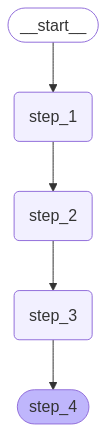

In [22]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

### Usage 

Let's proceed with simple invocation

In [11]:
graph.invoke({"value_1": "c"})

{'value_1': 'a b', 'value_2': 15}

### Build-in shorthand

In [12]:
graph_builder = StateGraph(State).add_sequence([step_1, step_2, step_3])
graph_builder.add_edge(START, "step_1")

graph = graph_builder.compile()

graph.invoke({"value_1": "c"})

{'value_1': 'a b', 'value_2': 10}